In [10]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# 기본 : ndarray 형태로 반환
# 반환값 : Bunch 객체로 dict와 유사
dataDict=load_diabetes()
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# 데이터프레임으로 받기
dataDict=load_diabetes(as_frame=True)
targetDF=dataDict['target']

In [6]:
# 스케일링 풀고 데이터 확인
data, target=load_diabetes(return_X_y=True, as_frame=True, scaled=False)

data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [7]:
# 상관관계 확인
data.corr()

# s1과 s2가 0.896663 양의 상관관계 보임

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [9]:
# [2-1] 피쳐 타겟 분리
features=data[['s1']]
target=data['s2']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target=> {target.shape}, {target.ndim}D')

features => (442, 1), 2D
target=> (442,), 1D


[2-2] 학습용 & 테스트용 데이터셋 분리
- 전체 데이터셋 => 학습용:테스트용=75:25, 80:20, 70:30

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    random_state=10)

In [12]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

[2-3] 피쳐 스케일링

In [13]:
mmScaler = MinMaxScaler()

In [14]:
mmScaler.fit(X_train)

MinMaxScaler()

In [15]:
# 학습용/테스트용 데이터셋 스케일링 진행
X_train_scaled=mmScaler.transform(X_train)
X_test_scaled=mmScaler.transform(X_test)

In [16]:
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((111, 1), -0.12154696132596687, 1.005524861878453)

[3] 학습 진행

In [17]:
# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [18]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 331, 'euclidean', {})

[4] 최적의 K 찾기

In [19]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 개수 설정 <= 모델 성능 좌우 : 하이퍼파라미터
    model.n_neighbors=k

    # 성능 평가
    score=model.score(X_test_scaled, y_test)

    scores[k]=score

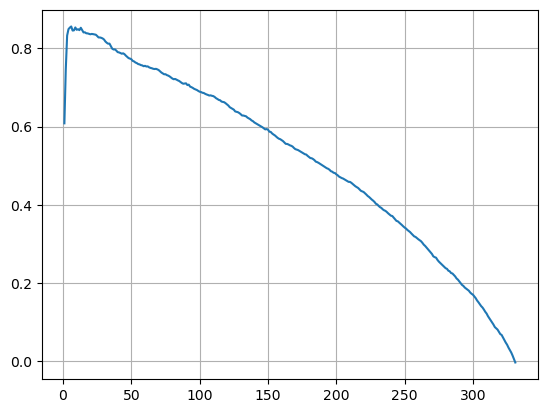

In [20]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [21]:
# 최고 성능의 K값                         x=(key, value)
best_k=sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

6

In [22]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors=best_k

[5] 새로운 데이터의 s2 예측하기

In [23]:
new_s1=217

In [24]:
# 2D DataFrame
dataDF=pd.DataFrame([[new_s1]],columns=['s1'])
dataDF

,s1
0,217


In [25]:
# 피쳐 스케일링
data_scaled=mmScaler.transform(dataDF)

In [26]:
# 예측
model.predict(data_scaled)

array([138.93333333])

In [27]:
distance, index=model.kneighbors(data_scaled)

print(distance, index, sep='\n')

[[0.         0.         0.         0.00552486 0.00552486 0.00552486]]
[[104 319  56 114   7 300]]


In [28]:
X_train.iloc[index.reshape(-1)]

,s1
104,217.0
319,217.0
56,217.0
114,216.0
7,218.0
300,218.0


In [29]:
X_train_scaled[[104,319,56,114,7,300]]

array([[0.54143646],
       [0.54143646],
       [0.54143646],
       [0.5359116 ],
       [0.54696133],
       [0.54696133]])

In [30]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

138.93333333333337

In [31]:
y_train[[104,319,56,114,7,300]]

104    124.2
319    149.4
56     125.6
114    146.2
7      144.0
300    144.2
Name: s2, dtype: float64